In [5]:
# -*- coding: utf-8 -*-
"""
Introduction to Pandas and Matplotlib
DS 220 - Data Visualization
"""

"""
Python is a powerful programming language used for many applications, including
data science.  There are many tools within Python that allow you to load, explore,
and visualize your data.  In this exercise, we'll use some of these tools to
answer questions about our data set.
"""

"""
About the data:
Many TV shows start off very strongly in their early seasons, only to tail off 
in later seasons and eventually get cancelled.  For this exercise, we will 
examine IMDB user ratings for the show Parks and Recreation, and see how well 
the show performed over its 7 year run.
"""

#To begin, we need to load several libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Next, we'll load the data set that you've downloaded from Canvas
simpsons = pd.read_csv('simpsons.csv', engine='python', encoding = "ISO-8859-1")
simpsons.head()



,EpisodeNum,Season,Episode,Title,UserRating,UserVotes
0,1.1,1,1,Simpsons Roasting on an Open Fire,8.2,"4,116"
1,1.2,1,2,Bart the Genius,7.8,"2,290"
2,1.3,1,3,Homer's Odyssey,7.5,"1,996"
3,1.4,1,4,There's No Disgrace Like Home,7.8,"1,979"
4,1.5,1,5,Bart the General,8.1,"2,021"


In [6]:
"""
Part I: Pandas
Pandas is a library used to shape dataframes.  It also contains some handy
tools for exploring our data
"""

#Let's see how "big" our data set is, by finding the number of rows and columns
simpsons.shape




(661, 6)

In [13]:

#To view these statistics for a single column:
simpsons['UserRating'].describe()



count    661.000000
mean       7.290015
std        0.781504
min        4.300000
25%        6.800000
50%        7.200000
75%        7.900000
max        9.300000
Name: UserRating, dtype: float64

In [14]:
#Pandas includes a handy feature called iloc, which lets you look up data based
#on its location in the dataframe.  Think of this as a cousing to vlookup in Excel

#To look up the Title of the episode with the lowest UserRating
simpsons.iloc[np.argmin(parks['UserRating'].values)]['Title']






'Lisa Goes Gaga'

In [15]:
#You can also lookup the max value
simpsons.iloc[np.argmax(parks['UserRating'].values)]['Title']



"Homer's Enemy"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nLab Question 6: Copy your boxplot with multiple seasons, and paste it into your \nWord document\n\nLab Question 7: Which season had the highest median UserRating?\n\nLab Question 8: Which season had the lowest median UserRating?\n'

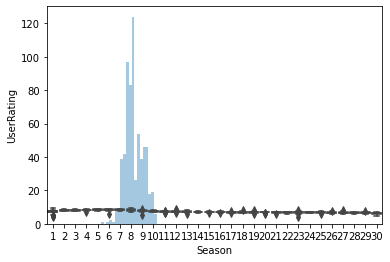

In [16]:


#Let's try our histogram in Seaborn
sns.distplot(simpsons['UserRating'], kde=False)

#Nicer, eh?  Now try the box plots:


"""
Lab Question 6: Copy your boxplot with multiple seasons, and paste it into your 
Word document

Lab Question 7: Which season had the highest median UserRating?

Lab Question 8: Which season had the lowest median UserRating?
"""



<AxesSubplot:ylabel='UserRating'>

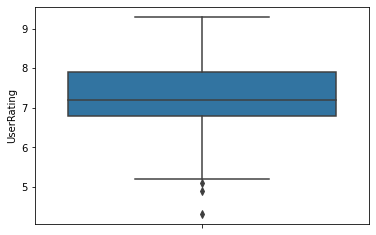

In [18]:
sns.boxplot(y='UserRating',data=simpsons)


<AxesSubplot:xlabel='Season', ylabel='UserRating'>

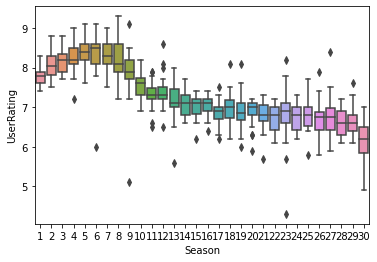

In [19]:
sns.boxplot(x='Season',y='UserRating',data=simpsons)

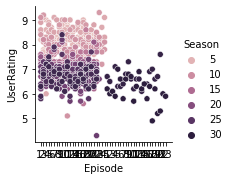

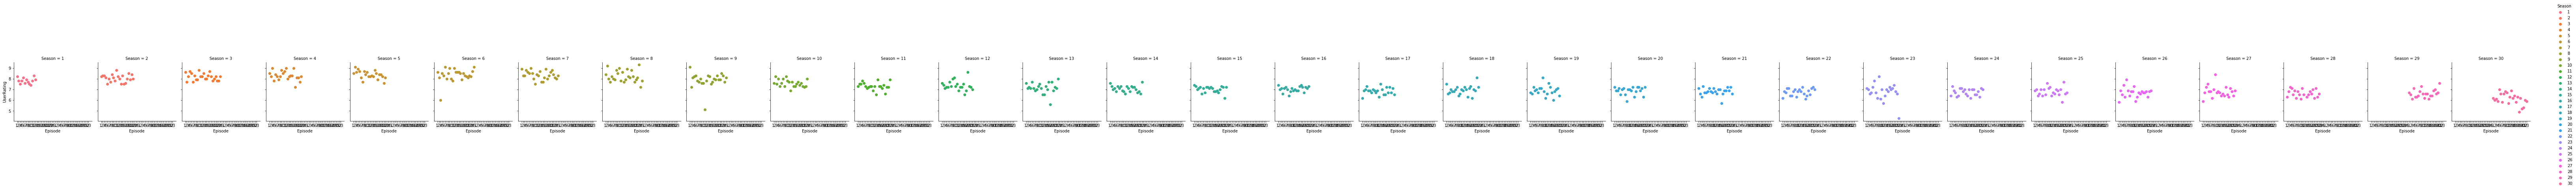

In [20]:
#We can also create a scatter plot to show the rating by episode
sns.pairplot(parks, x_vars='Episode', y_vars='UserRating', hue='Season')

#It's a little cluttered to have all episodes in one graph.  Let's use a common
#visualization technique called "small multiples" to separate one view in to
#several smaller views
g = sns.FacetGrid(parks, col='Season', hue='Season')
g.map(plt.scatter, 'Episode','UserRating')
g.add_legend();



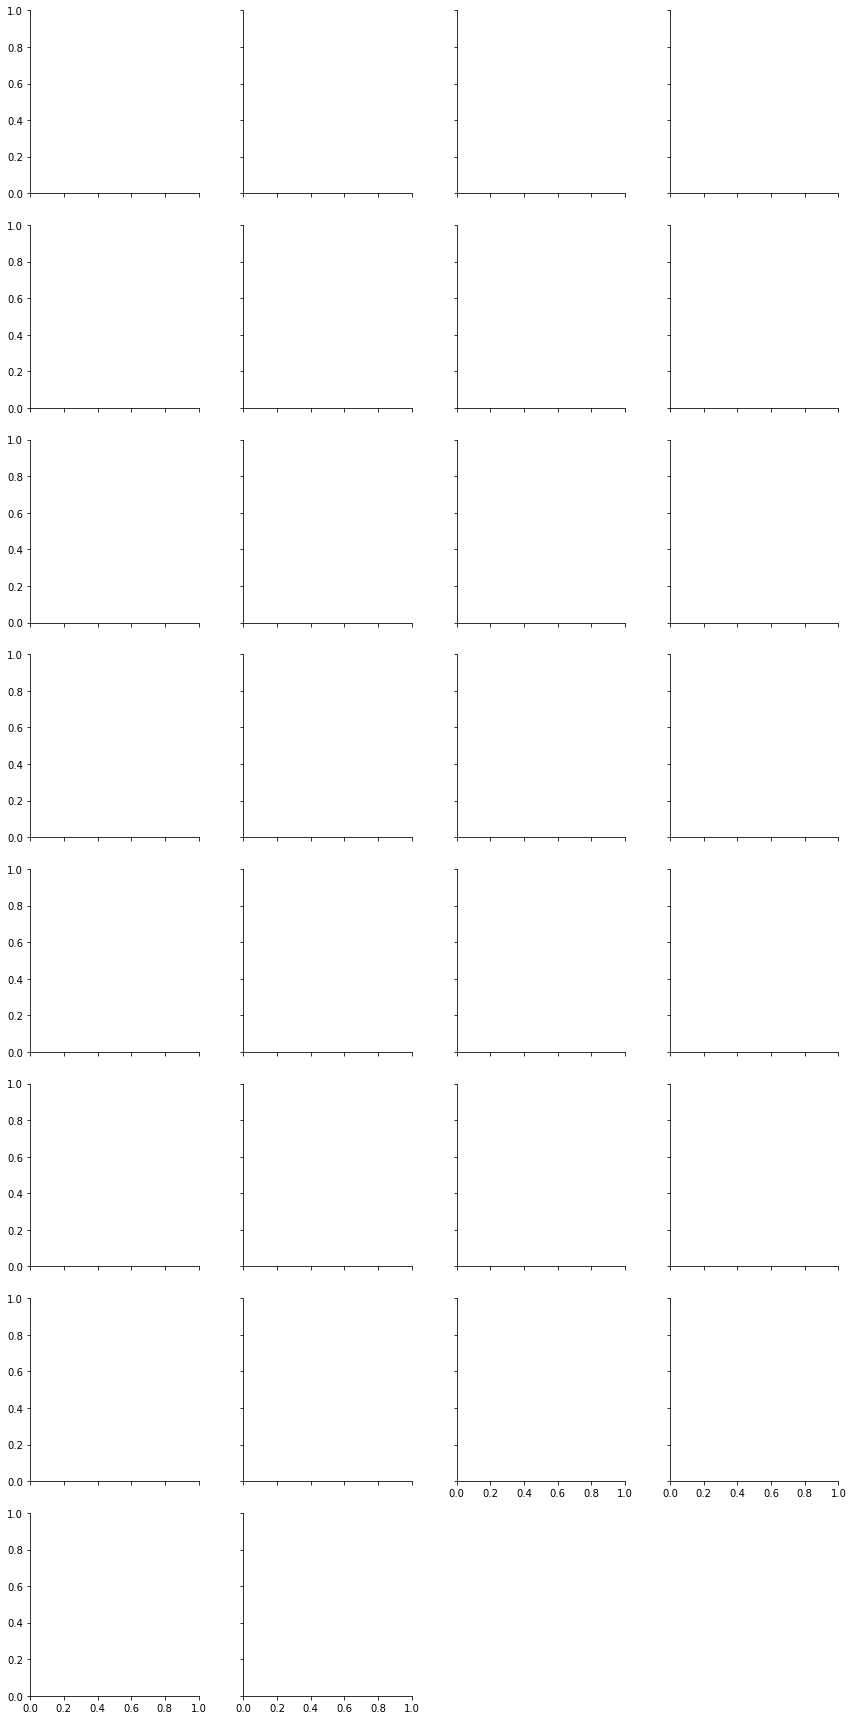

In [22]:
#We can also define how many small multiples we want on a single line, and
#wrap the rest onto additional lines
g = sns.FacetGrid(parks, col='Season', col_wrap=4, height=3, hue='Season')


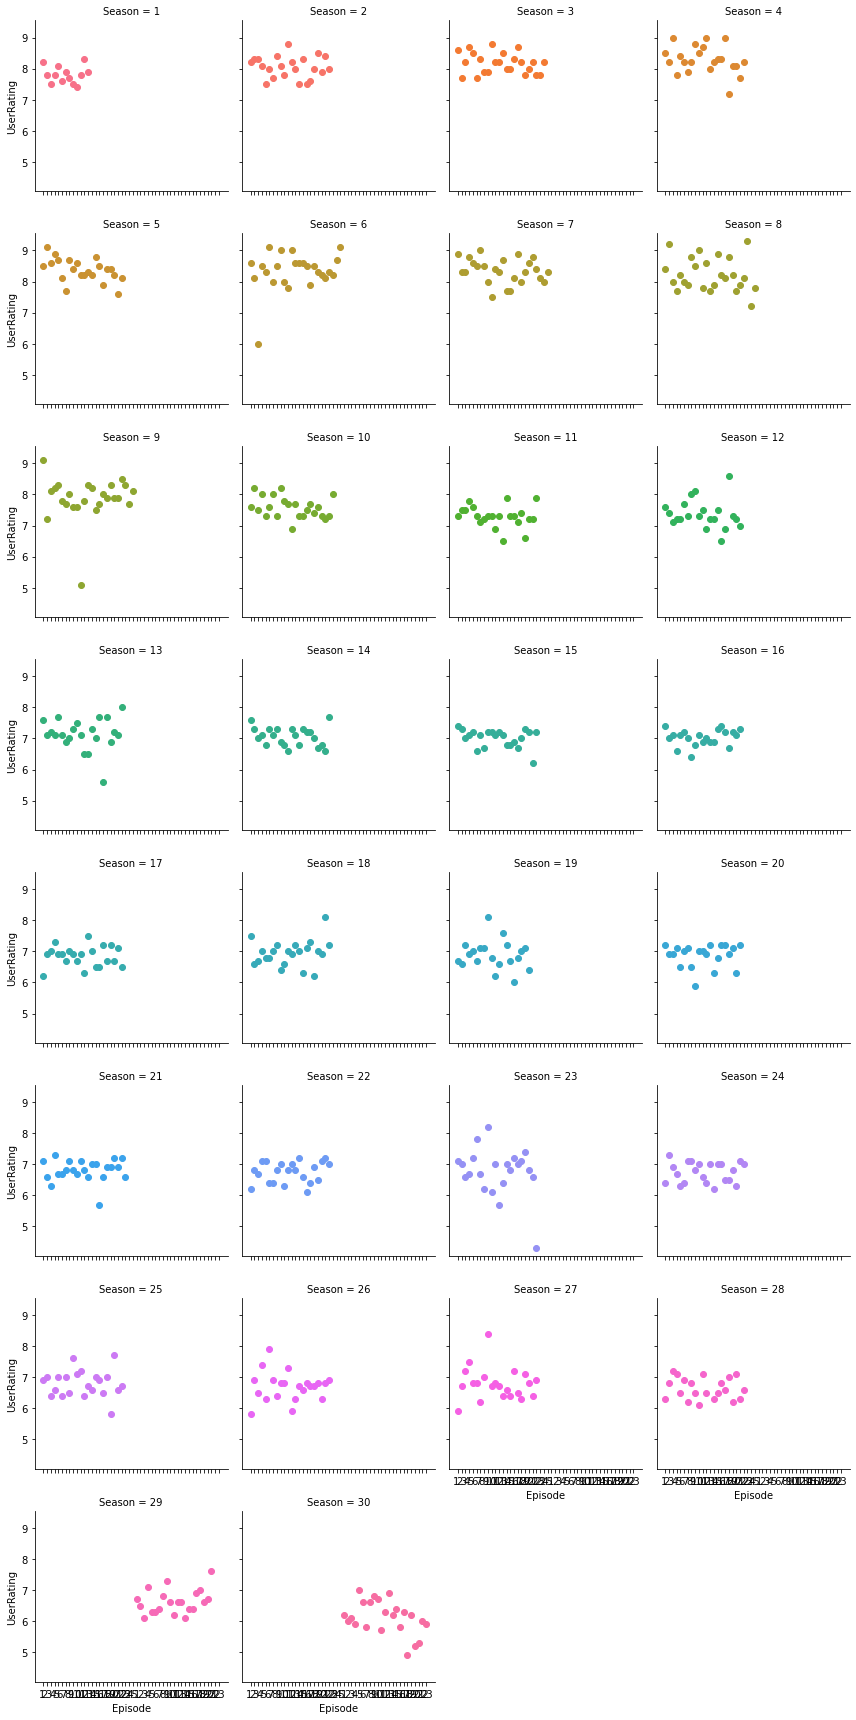

In [23]:
g = g.map(plt.scatter, 'Episode', 'UserRating', marker = "o")